<a href="https://colab.research.google.com/github/Anamika-Suresh/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
fea = df.iloc[:,:-1]
fea.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# standadization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(fea)
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
from sklearn.decomposition import PCA
pca = PCA() # n_components = 2
x_pca = pca.fit(x)
x_pca

PCA()

## explained varience is an attribute of the pca object that tells you how much varience each principle component captures from your data

In [6]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [7]:
# cumulative explained varience
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

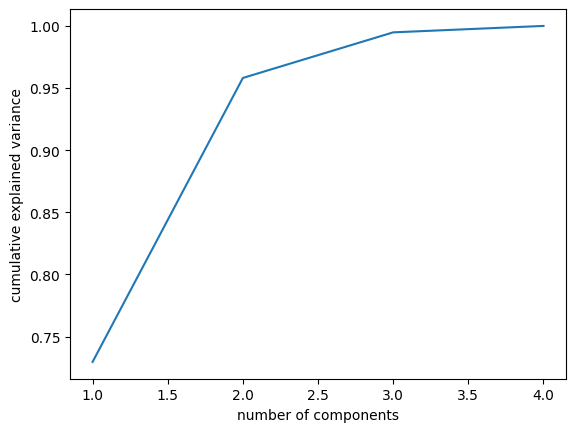

In [8]:
# plot
plt.plot(range(1,len(cumulative_variance)+1),cumulative_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# first two or three components will cover all important features

In [9]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
# convert to dataframe for easier plotting
x_pca = pd.DataFrame(x_pca,columns=['PC1','PC2'])
x_pca['species'] = df['species']
x_pca.head()

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


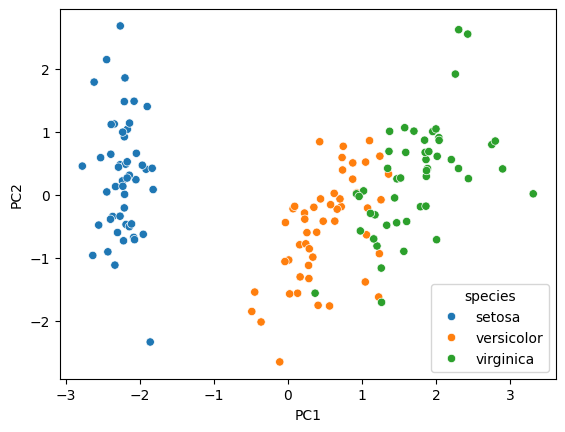

In [10]:
# plot reduced data
sns.scatterplot(data=x_pca,x='PC1',y='PC2',hue='species')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [12]:
# feature matrix
x=x_pca[['PC1','PC2']]
# target variable(species)
y = x_pca['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
accuracy_score(y_test,y_pred)

0.9

# t-SNE

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE